## Aggregation with dissolve
Spatial data are often more granular than needed. For example, you might have data on sub-national units, but you’re actually interested in studying patterns at the level of countries.

In a non-spatial setting, when you need summary statistics of the data, you can aggregate data using the [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby) function. But for spatial data, you sometimes also need to aggregate geometric features. In the GeoPandas library, you can aggregate geometric features using the [`dissolve()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.dissolve.html#geopandas.GeoDataFrame.dissolve) function.

[`dissolve()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.dissolve.html#geopandas.GeoDataFrame.dissolve) can be thought of as doing three things:

- it dissolves all the geometries within a given group together into a single geometric feature (using the [`unary_union`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.unary_union.html#geopandas.GeoSeries.unary_union) method), and
- it aggregates all the rows of data in a group using [groupby.aggregate](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby-aggregate), and
- it combines those two results.

### [`dissolve()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.dissolve.html#geopandas.GeoDataFrame.dissolve) Example
Take example of administrative areas in Nepal. You have districts, which are smaller, and zones, which are larger. A group of districts always compose a single zone. Suppose you are interested in Nepalese zone, but you only have Nepalese district-level data like the geoda.nepal dataset included in geodatasets. You can easily convert this to a zone-level dataset.

First, let’s look at the most simple case where you just want zone shapes and names.

In [1]:
import geodatasets
import geopandas

In [4]:
geodatasets.get_path('geoda.nepal')

'/home/yousef/.cache/geodatasets/nepal.zip'

In [5]:
nepal = geopandas.read_file(geodatasets.get_path('geoda.nepal'))
nepal.head()

,id,name_1,name_2,district,depecprov,povindex,pcinc,pcincppp,pcincmp,malkids,...,HEALTDAMT,HUMDAMT,INDDAMT,MULTDAMT,SOCDAMT,TOURDAMT,TRANDAMT,WATDAMT,TOTDAMT,geometry
0,1,None,Dhaualagiri,Baglung,27.01,27.33,354,573,25613,42.9,...,3584409,172736,369324,8050858,1308661,0,15421,1996315,32542286,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,2,None,Dhaualagiri,Mustang,31.51,31.16,1189,1922,85957,54.7,...,2253911,172736,0,3712798,633763,0,15421,0,14427364,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,3,None,Dhaualagiri,Myagdi,30.03,28.54,636,1028,45986,47.5,...,2279653,172736,369324,11784759,964089,0,2688597,854545,31437665,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,4,None,Dhaualagiri,Parbat,21.84,24.62,627,1013,45289,26.2,...,26574,0,369324,4741985,0,0,0,667767,10439874,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,5,Central,Bagmati,Bhaktapur,22.58,19.43,854,1379,61686,26.9,...,1338957,172736,0,2421424,1652237,0,16431544,23818495,49073311,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."


In [6]:
nepal = nepal.rename(columns={"name_2": "zone"})  # rename to remember the column
nepal[["zone", "geometry"]].head()

,zone,geometry
0,Dhaualagiri,"POLYGON ((83.10834 28.62020, 83.10560 28.60976..."
1,Dhaualagiri,"POLYGON ((83.99726 29.31675, 84.00000 29.31576..."
2,Dhaualagiri,"POLYGON ((83.50688 28.79306, 83.51024 28.78809..."
3,Dhaualagiri,"POLYGON ((83.70261 28.39837, 83.70435 28.39452..."
4,Bagmati,"POLYGON ((85.52173 27.71822, 85.52359 27.71375..."


By default, [`dissolve()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.dissolve.html#geopandas.GeoDataFrame.dissolve) will pass 'first' to [groupby.aggregate](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#groupby-aggregate).

In [7]:
nepal_zone = nepal[['zone', 'geometry']]
zones = nepal_zone.dissolve(by='zone')
zones.head()

,geometry
zone,
Bagmati,"POLYGON ((85.87653 27.61234, 85.87355 27.60861..."
Bheri,"POLYGON ((81.75089 28.31038, 81.75562 28.30740..."
Dhaualagiri,"POLYGON ((83.70647 28.39278, 83.70721 28.38781..."
Gandaki,"POLYGON ((84.49995 28.74099, 84.50443 28.74410..."
Janakpur,"POLYGON ((86.26166 26.91417, 86.25880 26.91144..."


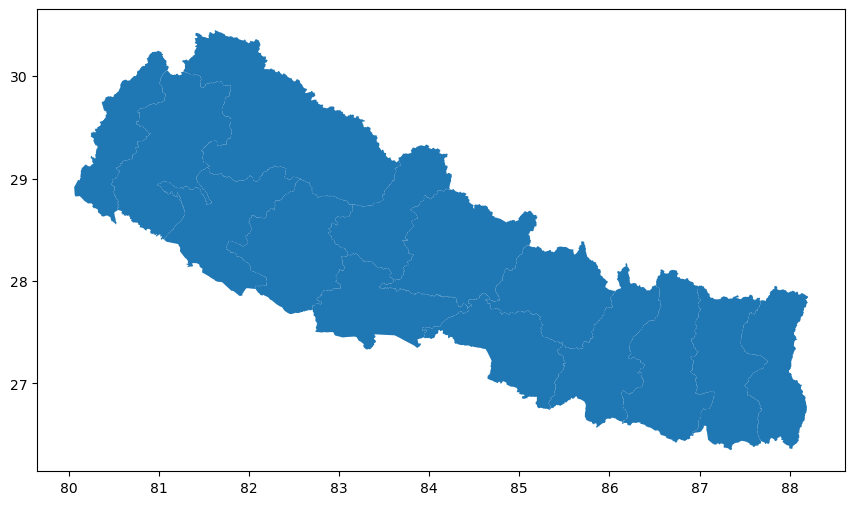

In [8]:
zones.plot(figsize=(12, 6));

If you are interested in aggregate populations, however, you can pass different functions to the [`dissolve()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.dissolve.html#geopandas.GeoDataFrame.dissolve) method to aggregate populations using the *`aggfunc =`* argument:

In [9]:
nepal_pop = nepal[['zone', 'geometry', 'population']]
zones = nepal_pop.dissolve(by='zone', aggfunc='sum')
zones.head()

,geometry,population
zone,,
Bagmati,"POLYGON ((85.87653 27.61234, 85.87355 27.60861...",3750441
Bheri,"POLYGON ((81.75089 28.31038, 81.75562 28.30740...",1463510
Dhaualagiri,"POLYGON ((83.70647 28.39278, 83.70721 28.38781...",516905
Gandaki,"POLYGON ((84.49995 28.74099, 84.50443 28.74410...",1530310
Janakpur,"POLYGON ((86.26166 26.91417, 86.25880 26.91144...",2818356


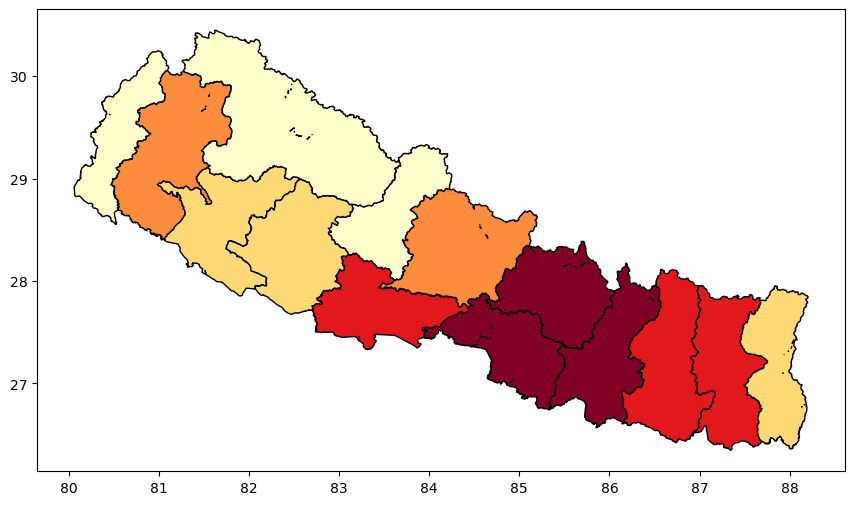

In [11]:
zones.plot(column='population', scheme='quantiles', edgecolor='black', cmap='YlOrRd', figsize=(12, 6));

Dissolve arguments
The *`aggfunc =`* argument defaults to ‘first’ which means that the first row of attributes values found in the dissolve routine will be assigned to the resultant dissolved geodataframe. However it also accepts other summary statistic options as allowed by [`pandas.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html#pandas.DataFrame.groupby) including:

- ‘first’
- ‘last’
- ‘min’
- ‘max’
- ‘sum’
- ‘mean’
- ‘median’
- function
- string function name
- list of functions and/or function names, e.g. [np.sum, ‘mean’]
- dict of axis labels -> functions, function names or list of such.

For example, to get the number of countries on each continent, as well as the populations of the largest and smallest country of each, you can aggregate the *`'name'`* column using *`'count'`*, and the *`'pop_est'`* column using *`'min'`* and *`'max'`*:

In [12]:
zones = nepal.dissolve(
     by="zone",
     aggfunc={
         "district": "count",
         "population": ["min", "max"],
     },
 )
zones.head()

,geometry,"(district, count)","(population, min)","(population, max)"
zone,,,,
Bagmati,"POLYGON ((85.87653 27.61234, 85.87355 27.60861...",8,42125,1688131
Bheri,"POLYGON ((81.75089 28.31038, 81.75562 28.30740...",5,170090,422812
Dhaualagiri,"POLYGON ((83.70647 28.39278, 83.70721 28.38781...",4,11585,250065
Gandaki,"POLYGON ((84.49995 28.74099, 84.50443 28.74410...",6,5827,480851
Janakpur,"POLYGON ((86.26166 26.91417, 86.25880 26.91144...",6,184931,765959
